In [156]:
import numpy as np
import random as rand
class DSELinearClassifier:
    def __init__(self ,activation,random_state):
        self.activation = activation
        self.random_state = random_state
        self.weights = np.random.rand(2)
        activation = activation
    ##LOGISTIC REGRESSION)
    def sigmoid(self,z):
        return 1.0 / (1 + np.exp(-z))
    def cost_function(self, X, y):
        z = np.dot(X, self.weights)
        result = None
        if self.activation == 'Logistic':
            predict_1 = y * np.log(self.sigmoid(z))
            predict_0 = (1 - y) * np.log(1 - self.sigmoid(z))
            result = -sum(predict_1 + predict_0) / len(X)
        if self.activation =='HyperTan':
            predict_1 = y * np.log(np.tanh(z))
            predict_0 = (1 - y) * np.log(1 - np.tanh(z))
            result = -sum(predict_1 + predict_0) / len(X)
        return result
    def get_errors(self):
    def predict(self,X):
        z = np.dot(X, self.weights)
        print(z)
       # result = None
        if self.activation == 'Logistic':
            result =  [1 if i >= 0.5 else 0 for i in self.sigmoid(z)]
        if self.activation == 'HyperTan':
            result =  [1 if i >= 0 else 0 for i in np.tanh(z)]
        if self.activation == 'Perceptron':
            result= [1 if i >=0 else -1 for i in z]
        return result
    def predict_perceptron(self,X):
        z = np.dot(X, self.weights)
        if z>=0:
            return 1
        else:
            return -1
    def print_activation(self):
        print(self.activation)
    def return_weights(self):
        return self.weights
    def fit(self, X, y, epochs=5, lr=0.05):        
        loss = []
        N = len(X)   
        weights = self.weights
        if self.activation == 'Logistic':
            for _ in range(epochs):        
                # Gradient Descent
                y_hat = self.sigmoid(np.dot(X, weights))
                weights -= lr * np.dot(X.T,  y_hat - y) / N  
                print(weights.shape)
                # Saving Progress
                loss.append(self.cost_function(X, y))           
            self.weights = weights
            self.loss = loss       
        if self.activation == 'HyperTan': 
            for _ in range(epochs):        
                # Gradient Descent
                y_hat = np.tanh(np.dot(X, weights))
                weights -= lr * np.dot(X.T,  y_hat - y) / N            
                # Saving Progress
                loss.append(self.cost_function(X, y))           
            self.weights = weights
            self.loss = loss
        if self.activation == 'Perceptron':
            for _ in range(epochs):
                sum_error = 0.0
                for row in range(len(X)):
                    error = y[row] - self.predict_perceptron(X[row])
                    weights[0] = weights[0] + lr*error*X[row,0]
                    weights[1] = weights[1] + lr*error*X[row,1]
            self.weights = weights    

In [81]:
import numpy as np
import random as rand
from sklearn.datasets import make_blobs,make_circles
from sklearn.metrics import classification_report
class DSELinearClassifier:
    def __init__(self ,activation,random_state):
        self.activation = activation
        self.random_state = random_state
        self.weights = np.random.rand(2)
        activation = activation
        np.random.seed(random_state)
        self.sum_error = []
        self.batch_size = 5
    ##LOGISTIC REGRESSION)
    def sigmoid(self,z):
        return 1.0 / (1 + np.exp(-z))
    def cost_function(self, X, y):
        z = np.dot(X, self.weights)
        if self.activation == 'Logistic':
            predict_1 = y * np.log(self.sigmoid(z))
            predict_0 = (1 - y) * np.log(1 - self.sigmoid(z))
            result = -sum(predict_1 + predict_0) / len(X)
            self.sum_error.append(result)
        if self.activation =='HyperTan':
            predict_1 = y * np.log(np.tanh(z))
            predict_0 = (1 - y) * np.log(1 - np.tanh(z))
            result = -sum(predict_1 + predict_0) / len(X)
            self.sum_error.append(result)
        if self.activation =='Perceptron':
            result = self.sum_errors
        return result
    def predict(self,X):
        z = np.dot(X, self.weights)
       # result = None
        if self.activation == 'Logistic':
            result =  [1 if i >= 0.5 else 0 for i in self.sigmoid(z)]
        if self.activation == 'HyperTan':
            result =  [1 if i >= 0 else 0 for i in np.tanh(z)]
        if self.activation == 'Perceptron':
            result= [1 if i >=0 else 0 for i in z]
        return result
    def predict_perceptron(self,X):
        z = np.dot(X, self.weights)
        if z>=0:
            return 1
        else:
            return -1
    def print_activation(self):
        print(self.activation)
    def return_weights(self):
        return self.weights
    def fit(self, X, y, epochs=5, lr=0.05):        
        loss = []
        N = len(X)   
        weights = self.weights
        if self.activation == 'Logistic':
            X =  np.array_split(X,self.batch_size)
            y =  np.array_split(y,self.batch_size)
            for _ in range(epochs):  
                for i,batch in enumerate(X):
                    # Gradient Descent
                    y_hat = self.sigmoid(np.dot(batch, weights))
                    weights -= lr * np.dot(batch.T,  y_hat - y[i]) / N  
                    # Saving Progress
                    loss.append(self.cost_function(batch, y[i])) 
                    self.sum_error.append(self.cost_function(batch, y[i]))
                self.weights = weights
                self.loss = loss
   
        if self.activation == 'HyperTan': 
            X =  np.array_split(X,self.batch_size)
            y =  np.array_split(y,self.batch_size)
            for _ in range(epochs): 
                for i,batch in enumerate(X):
                # Gradient Descent
                    y_hat = np.tanh(np.dot(batch, weights))
                    weights -= lr * np.dot(batch.T,  y_hat - y[i]) / N            
                    # Saving Progress
                    loss.append(self.cost_function(batch, y[i]))  
                    self.sum_error.append(self.cost_function(batch, y[i]))
                self.weights = weights
                self.loss = loss
                self.sum_error.append(loss)
        if self.activation == 'Perceptron':
            for _ in range(epochs):
                self.sum_error = 0
                for row in range(len(X)):
                    error = y[row] - self.predict_perceptron(X[row])
                    weights[0] = weights[0] + lr*error*X[row,0]
                    weights[1] = weights[1] + lr*error*X[row,1]
                    self.sum_error.append(error)
            self.weights = weights   

In [67]:
import DSEHW1

## LOGISTIC

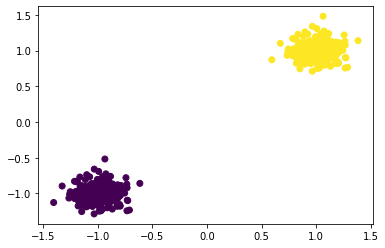

In [18]:
from sklearn.datasets import make_blobs,make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
X_classA, y_classA = make_blobs(n_samples=250 ,n_features=2,cluster_std = 1/8,center_box=(-1, -1),centers=1,random_state=42 )
X_classB, y_classB = make_blobs(n_samples=250 ,n_features=2,cluster_std = 1/8,center_box=(1, 1) ,centers=1,random_state=42)
y_classB = np.ones(y_classB.shape)
X = np.concatenate((X_classA, X_classB), axis=0)
y = np.concatenate((y_classA, y_classB), axis=0).astype(int)
plt.scatter(X[:,0],X[:,1],c=y)

In [20]:

model = DSELinearClassifier(activation='Perceptron',random_state=42)
model.print_activation()
model.fit(X_train,y_train)
yhat = model.predict(X)

Perceptron


# two blobs well separated

In [86]:
X_classA, y_classA = make_blobs(n_samples=250 ,n_features=2,cluster_std = 1/8,center_box=(-1, -1),centers=1,random_state=42 )
X_classB, y_classB = make_blobs(n_samples=250 ,n_features=2,cluster_std = 1/8,center_box=(1, 1) ,centers=1,random_state=42)
y_classB = np.ones(y_classB.shape)
X = np.concatenate((X_classA, X_classB), axis=0)
y = np.concatenate((y_classA, y_classB), axis=0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Logistic
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       170

    accuracy                           1.00       335
   macro avg       1.00      1.00      1.00       335
weighted avg       1.00      1.00      1.00       335

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        80

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



<AxesSubplot:>

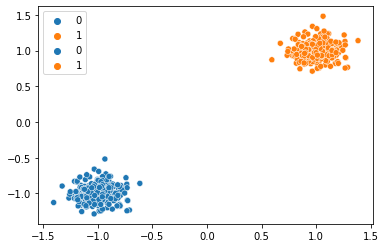

In [87]:
model = DSELinearClassifier(activation='Logistic',random_state=42)
model.print_activation()
model.fit(X_train,y_train)
yhat_test = model.predict(X_test)
yhat_train = model.predict(X_train)
print(classification_report(y_train, yhat_train))
print(classification_report(y_test, yhat_test))
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], hue=yhat_train)
sns.scatterplot(x=X_test[:,0], y= X_test[:,1], hue=yhat_test)


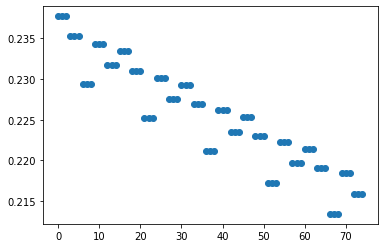

In [88]:
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)

Logistic
Logistic


Text(0.5, 1.0, 'Blue is lr=0.1, orange is 0.2')

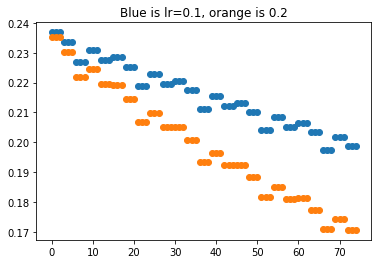

In [96]:
model = DSELinearClassifier(activation='Logistic',random_state=42)
model.print_activation()
model.fit(X_train,y_train, lr = 0.1)
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)
model = DSELinearClassifier(activation='Logistic',random_state=42)
model.print_activation()
model.fit(X_train,y_train, lr = 0.2)
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)
plt.title("Blue is lr=0.1, orange is 0.2")

### initialize the weights to be way off with “initial_weight = (5,5)

Logistic


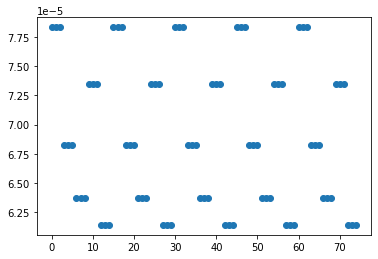

In [101]:
model = DSELinearClassifier(activation='Logistic',random_state=42)
model.print_activation()
model.weights = np.array([5.,5.])
model.fit(X_train,y_train)
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)

# tanh

HyperTan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       170

    accuracy                           1.00       335
   macro avg       1.00      1.00      1.00       335
weighted avg       1.00      1.00      1.00       335

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        80

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



<ipython-input-58-304ded0bb28e>:25: RuntimeWarning: invalid value encountered in log
  predict_1 = y * np.log(np.tanh(z))


<AxesSubplot:>

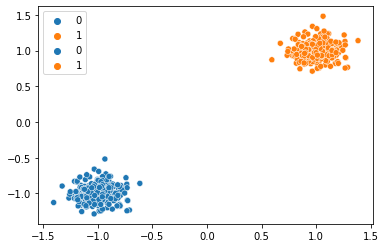

In [64]:
model = DSELinearClassifier(activation='HyperTan',random_state=42)
model.print_activation()
model.fit(X_train,y_train)
yhat_test = model.predict(X_test)
yhat_train = model.predict(X_train)
print(classification_report(y_train, yhat_train))
print(classification_report(y_test, yhat_test))
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], hue=yhat_train)
sns.scatterplot(x=X_test[:,0], y= X_test[:,1], hue=yhat_test)

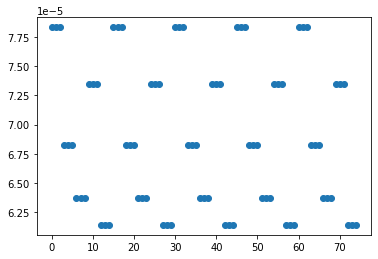

In [102]:
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)

In [ ]:
model = DSELinearClassifier(activation='HyperTan',random_state=42)
model.print_activation()
model.fit(X_train,y_train, lr = 0.1)
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)
model = DSELinearClassifier(activation='HyperTan',random_state=42)
model.print_activation()
model.fit(X_train,y_train, lr = 0.2)
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)
plt.title("Blue is lr=0.1, orange is 0.2")

In [ ]:
model = DSELinearClassifier(activation='HyperTan',random_state=42)
model.print_activation()
model.weights = np.array([5.,5.])
model.fit(X_train,y_train)
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)

## Perceptron


Perceptron
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     165.0
           1       0.00      0.00      0.00     170.0

    accuracy                           0.00     335.0
   macro avg       0.00      0.00      0.00     335.0
weighted avg       0.00      0.00      0.00     335.0

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      85.0
           1       0.00      0.00      0.00      80.0

    accuracy                           0.00     165.0
   macro avg       0.00      0.00      0.00     165.0
weighted avg       0.00      0.00      0.00     165.0



<AxesSubplot:>

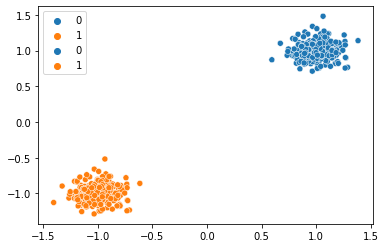

In [28]:
model = DSELinearClassifier(activation='Perceptron',random_state=42)
model.print_activation()
model.fit(X_train,y_train)
yhat_test = model.predict(X_test)
yhat_train = model.predict(X_train)
print(classification_report(y_train, yhat_train))
print(classification_report(y_test, yhat_test))
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], hue=yhat_train)
sns.scatterplot(x=X_test[:,0], y= X_test[:,1], hue=yhat_test)

In [ ]:
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)

In [ ]:
model = DSELinearClassifier(activation='Perceptron',random_state=42)
model.print_activation()
model.fit(X_train,y_train, lr = 0.1)
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)
model = DSELinearClassifier(activation='Perceptron',random_state=42)
model.print_activation()
model.fit(X_train,y_train, lr = 0.2)
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)
plt.title("Blue is lr=0.1, orange is 0.2")

In [ ]:
model = DSELinearClassifier(activation='Perceptron',random_state=42)
model.print_activation()
model.weights = np.array([5.,5.])
model.fit(X_train,y_train)
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)

# two blobs poorly separated

In [31]:
X_classA, y_classA = make_blobs(n_samples=250 ,n_features=2,cluster_std = 4,center_box=(-1, -1),centers=1,random_state=42 )
X_classB, y_classB = make_blobs(n_samples=250 ,n_features=2,cluster_std = 4,center_box=(1, 1) ,centers=1,random_state=42)
y_classB = np.ones(y_classB.shape)
X = np.concatenate((X_classA, X_classB), axis=0)
y = np.concatenate((y_classA, y_classB), axis=0).astype(int)

Logistic
              precision    recall  f1-score   support

           0       0.62      0.61      0.61       165
           1       0.63      0.63      0.63       170

    accuracy                           0.62       335
   macro avg       0.62      0.62      0.62       335
weighted avg       0.62      0.62      0.62       335

              precision    recall  f1-score   support

           0       0.60      0.65      0.62        85
           1       0.59      0.55      0.57        80

    accuracy                           0.60       165
   macro avg       0.60      0.60      0.60       165
weighted avg       0.60      0.60      0.60       165



<AxesSubplot:>

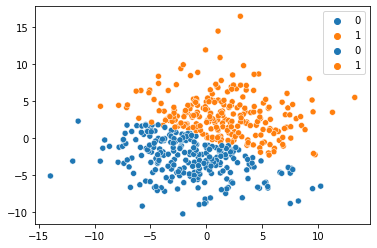

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = DSELinearClassifier(activation='Logistic',random_state=42)
model.print_activation()
model.fit(X_train,y_train)
yhat_test = model.predict(X_test)
yhat_train = model.predict(X_train)
print(classification_report(y_train, yhat_train))
print(classification_report(y_test, yhat_test))
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], hue=yhat_train)
sns.scatterplot(x=X_test[:,0], y= X_test[:,1], hue=yhat_test)

In [ ]:
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)

HyperTan
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       165
           1       0.61      0.63      0.62       170

    accuracy                           0.61       335
   macro avg       0.61      0.61      0.61       335
weighted avg       0.61      0.61      0.61       335

              precision    recall  f1-score   support

           0       0.59      0.65      0.62        85
           1       0.58      0.53      0.55        80

    accuracy                           0.59       165
   macro avg       0.59      0.59      0.59       165
weighted avg       0.59      0.59      0.59       165



<ipython-input-2-390d530992df>:25: RuntimeWarning: invalid value encountered in log
  predict_1 = y * np.log(np.tanh(z))


<AxesSubplot:>

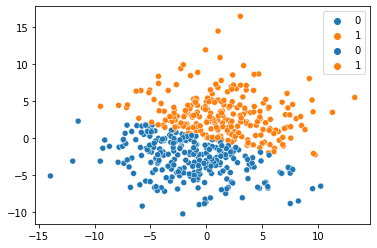

In [33]:
model = DSELinearClassifier(activation='HyperTan',random_state=42)
model.print_activation()
model.fit(X_train,y_train)
yhat_test = model.predict(X_test)
yhat_train = model.predict(X_train)
print(classification_report(y_train, yhat_train))
print(classification_report(y_test, yhat_test))
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], hue=yhat_train)
sns.scatterplot(x=X_test[:,0], y= X_test[:,1], hue=yhat_test)

In [ ]:
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)

Perceptron
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       165
           1       0.49      0.49      0.49       170

    accuracy                           0.48       335
   macro avg       0.48      0.48      0.48       335
weighted avg       0.48      0.48      0.48       335

              precision    recall  f1-score   support

           0       0.46      0.44      0.45        85
           1       0.44      0.46      0.45        80

    accuracy                           0.45       165
   macro avg       0.45      0.45      0.45       165
weighted avg       0.45      0.45      0.45       165



<AxesSubplot:>

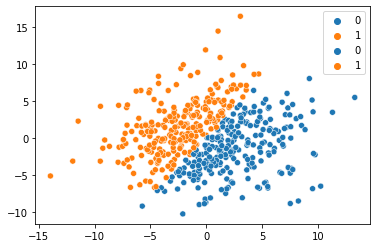

In [35]:
model = DSELinearClassifier(activation='Perceptron',random_state=42)
model.print_activation()
model.fit(X_train,y_train)
yhat_test = model.predict(X_test)
yhat_train = model.predict(X_train)
print(classification_report(y_train, yhat_train))
print(classification_report(y_test, yhat_test))
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], hue=yhat_train)
sns.scatterplot(x=X_test[:,0], y= X_test[:,1], hue=yhat_test)

In [ ]:
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)

 blob and a circle# two blobs poorly separated

# blob and a circle

In [45]:
X_classA, y_classA = make_circles(n_samples=500)
X_classB, y_classB = make_circles(n_samples=500,factor = 0.99)
y_classB = np.ones(y_classB.shape)
s2 = 1/8
X_classA[:,0] = X_classA[:,0]*s2/X_classA[:,0].std()
X_classA[:,1] = X_classA[:,1]*s2/X_classA[:,1].std()
X = np.concatenate((X_classA, X_classB), axis=0)
y = np.concatenate((y_classA, y_classB), axis=0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Logistic
              precision    recall  f1-score   support

           0       0.25      0.50      0.34       173
           1       0.74      0.49      0.59       497

    accuracy                           0.49       670
   macro avg       0.49      0.49      0.46       670
weighted avg       0.61      0.49      0.52       670

              precision    recall  f1-score   support

           0       0.24      0.51      0.33        77
           1       0.78      0.52      0.62       253

    accuracy                           0.52       330
   macro avg       0.51      0.51      0.48       330
weighted avg       0.65      0.52      0.56       330



<AxesSubplot:>

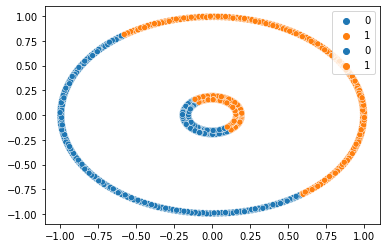

In [46]:
model = DSELinearClassifier(activation='Logistic',random_state=42)
model.print_activation()
model.fit(X_train,y_train)
yhat_test = model.predict(X_test)
yhat_train = model.predict(X_train)
print(classification_report(y_train, yhat_train))
print(classification_report(y_test, yhat_test))
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], hue=yhat_train)
sns.scatterplot(x=X_test[:,0], y= X_test[:,1], hue=yhat_test)

In [ ]:
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)

HyperTan
              precision    recall  f1-score   support

           0       0.25      0.49      0.34       173
           1       0.74      0.50      0.60       497

    accuracy                           0.50       670
   macro avg       0.50      0.50      0.47       670
weighted avg       0.61      0.50      0.53       670

              precision    recall  f1-score   support

           0       0.24      0.52      0.33        77
           1       0.77      0.50      0.61       253

    accuracy                           0.51       330
   macro avg       0.51      0.51      0.47       330
weighted avg       0.65      0.51      0.54       330



<ipython-input-2-390d530992df>:25: RuntimeWarning: invalid value encountered in log
  predict_1 = y * np.log(np.tanh(z))


<AxesSubplot:>

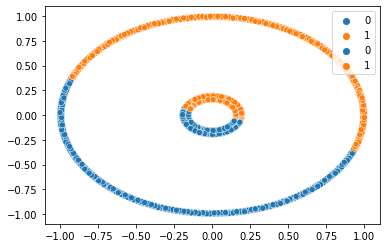

In [48]:
model = DSELinearClassifier(activation='HyperTan',random_state=42)
model.print_activation()
model.fit(X_train,y_train)
yhat_test = model.predict(X_test)
yhat_train = model.predict(X_train)
print(classification_report(y_train, yhat_train))
print(classification_report(y_test, yhat_test))
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], hue=yhat_train)
sns.scatterplot(x=X_test[:,0], y= X_test[:,1], hue=yhat_test)

In [ ]:
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)

Perceptron
              precision    recall  f1-score   support

           0       0.26      0.50      0.34       173
           1       0.74      0.49      0.59       497

    accuracy                           0.49       670
   macro avg       0.50      0.50      0.46       670
weighted avg       0.61      0.49      0.53       670

              precision    recall  f1-score   support

           0       0.24      0.49      0.32        77
           1       0.77      0.52      0.62       253

    accuracy                           0.51       330
   macro avg       0.50      0.51      0.47       330
weighted avg       0.65      0.51      0.55       330



<AxesSubplot:>

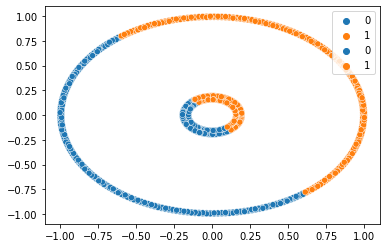

In [49]:
model = DSELinearClassifier(activation='Perceptron',random_state=42)
model.print_activation()
model.fit(X_train,y_train)
yhat_test = model.predict(X_test)
yhat_train = model.predict(X_train)
print(classification_report(y_train, yhat_train))
print(classification_report(y_test, yhat_test))
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], hue=yhat_train)
sns.scatterplot(x=X_test[:,0], y= X_test[:,1], hue=yhat_test)

In [ ]:
plt.scatter(x=list(range(0,len(model.sum_error))),y=model.sum_error)